In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Plotly
import plotly.graph_objects as go
import plotly.express as px

In [473]:
vino_df = pd.read_csv("Vivino_data.csv")
vino_df.head(10)

Unnamed: 0                                Name      Country        Region  \
0           0                        Pomerol 2011       France       Pomerol   
1           1                          Lirac 2017       France         Lirac   
2           2  Erta e China Rosso di Toscana 2015        Italy       Toscana   
3           3                      Bardolino 2019        Italy     Bardolino   
4           4      Ried Scheibner Pinot Noir 2016      Austria     Carnuntum   
5           5    Gigondas (Nobles Terrasses) 2017       France      Gigondas   
6           6   Marion's Vineyard Pinot Noir 2016  New Zealand     Wairarapa   
7           7                      Red Blend 2014        Chile  Itata Valley   
8           8                        Chianti 2015        Italy       Chianti   
9           9                      Tradition 2014       France     Minervois   

                     Winery  Rating  NumberOfRatings  Price  Year Style  
0     Château La Providence     4.2              100  95.00  2011   red  
1        Château Mont-Redon     4.3              100  15.50  2017   red  
2                Renzo Masi     3.9              100   7.45  2015   red  
3                Cavalchina     3.5              100   8.72  2019   red  
4               Markowitsch     3.9              100  29.15  2016   red  
5             Vieux Clocher     3.7              100  19.90  2017   red  
6                  Schubert     4.0              100  43.87  2016   red  
7             Viña La Causa     3.9              100  17.52  2014   red  
8         Castello Montaùto     3.6              100  10.75  2015   red  
9  Domaine des Aires Hautes     3.5              100   6.90  2014   red

In [474]:
vino_df.tail()

Unnamed: 0                        Name   Country             Region  \
13829       13829    Côte des Roses Rosé 2019    France          Languedoc   
13830       13830                 M Rosé 2019    France  Côtes de Provence   
13831       13831  Whispering Angel Rosé 2019    France  Côtes de Provence   
13832       13832       Vinho Verde Rosé N.V.  Portugal        Vinho Verde   
13833       13833      The Original Rosé N.V.  Portugal              Douro   

                  Winery  Rating  NumberOfRatings  Price  Year Style  
13829    Gérard Bertrand     3.9             1750   9.36  2019  rose  
13830             Minuty     4.0             2046  12.85  2019  rose  
13831  Château d'Esclans     4.2             2990  16.47  2019  rose  
13832       Casal Garcia     3.5             9493   4.35  N.V.  rose  
13833             Mateus     3.6            29531   5.99  N.V.  rose

In [475]:
vino_df.shape

(13834, 10)

In [476]:
vino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13834 non-null  int64  
 1   Name             13834 non-null  object 
 2   Country          13834 non-null  object 
 3   Region           13834 non-null  object 
 4   Winery           13834 non-null  object 
 5   Rating           13834 non-null  float64
 6   NumberOfRatings  13834 non-null  int64  
 7   Price            13834 non-null  float64
 8   Year             13834 non-null  object 
 9   Style            13834 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [477]:
vino_df.describe()

Unnamed: 0        Rating  NumberOfRatings         Price
count  13834.000000  13834.000000     13834.000000  13834.000000
mean    6916.500000      3.865664       428.322466     33.024850
std     3993.676147      0.296427      1838.413812     70.899893
min        0.000000      2.200000        25.000000      3.150000
25%     3458.250000      3.700000        56.000000      9.902500
50%     6916.500000      3.900000       129.000000     15.950000
75%    10374.750000      4.100000       336.000000     32.500000
max    13833.000000      4.900000     94287.000000   3410.790000

In [478]:
vino_df.columns

Index(['Unnamed: 0', 'Name', 'Country', 'Region', 'Winery', 'Rating',
       'NumberOfRatings', 'Price', 'Year', 'Style'],
      dtype='object')

In [479]:
def data_clean(vino_df):
    vino_df = vino_df.drop("Name", axis=1)
    vino_df = vino_df.drop("Unnamed: 0", axis=1)
    vino_df['Year'] = vino_df['Year'].replace('N.V.', 2030) # it's important, that there were no 2030 year wines in list before
    vino_df['Year'] = vino_df['Year'].astype('int')
    vino_df.isnull().any()
    vino_df.isnull().sum()/ vino_df.shape[0]
    return vino_df

In [480]:
vino_df = data_clean(vino_df)
vino_df.tail()

Country             Region             Winery  Rating  \
13829    France          Languedoc    Gérard Bertrand     3.9   
13830    France  Côtes de Provence             Minuty     4.0   
13831    France  Côtes de Provence  Château d'Esclans     4.2   
13832  Portugal        Vinho Verde       Casal Garcia     3.5   
13833  Portugal              Douro             Mateus     3.6   

       NumberOfRatings  Price  Year Style  
13829             1750   9.36  2019  rose  
13830             2046  12.85  2019  rose  
13831             2990  16.47  2019  rose  
13832             9493   4.35  2030  rose  
13833            29531   5.99  2030  rose

In [481]:
def caunt(vino_df):
    plt.figure(figsize=(20,10))
    sns.barplot(x = "Country",
                y = "Rating",
                hue = "Style",
                data = vino_df)
    plt.xticks(rotation=90)
    plt.show()

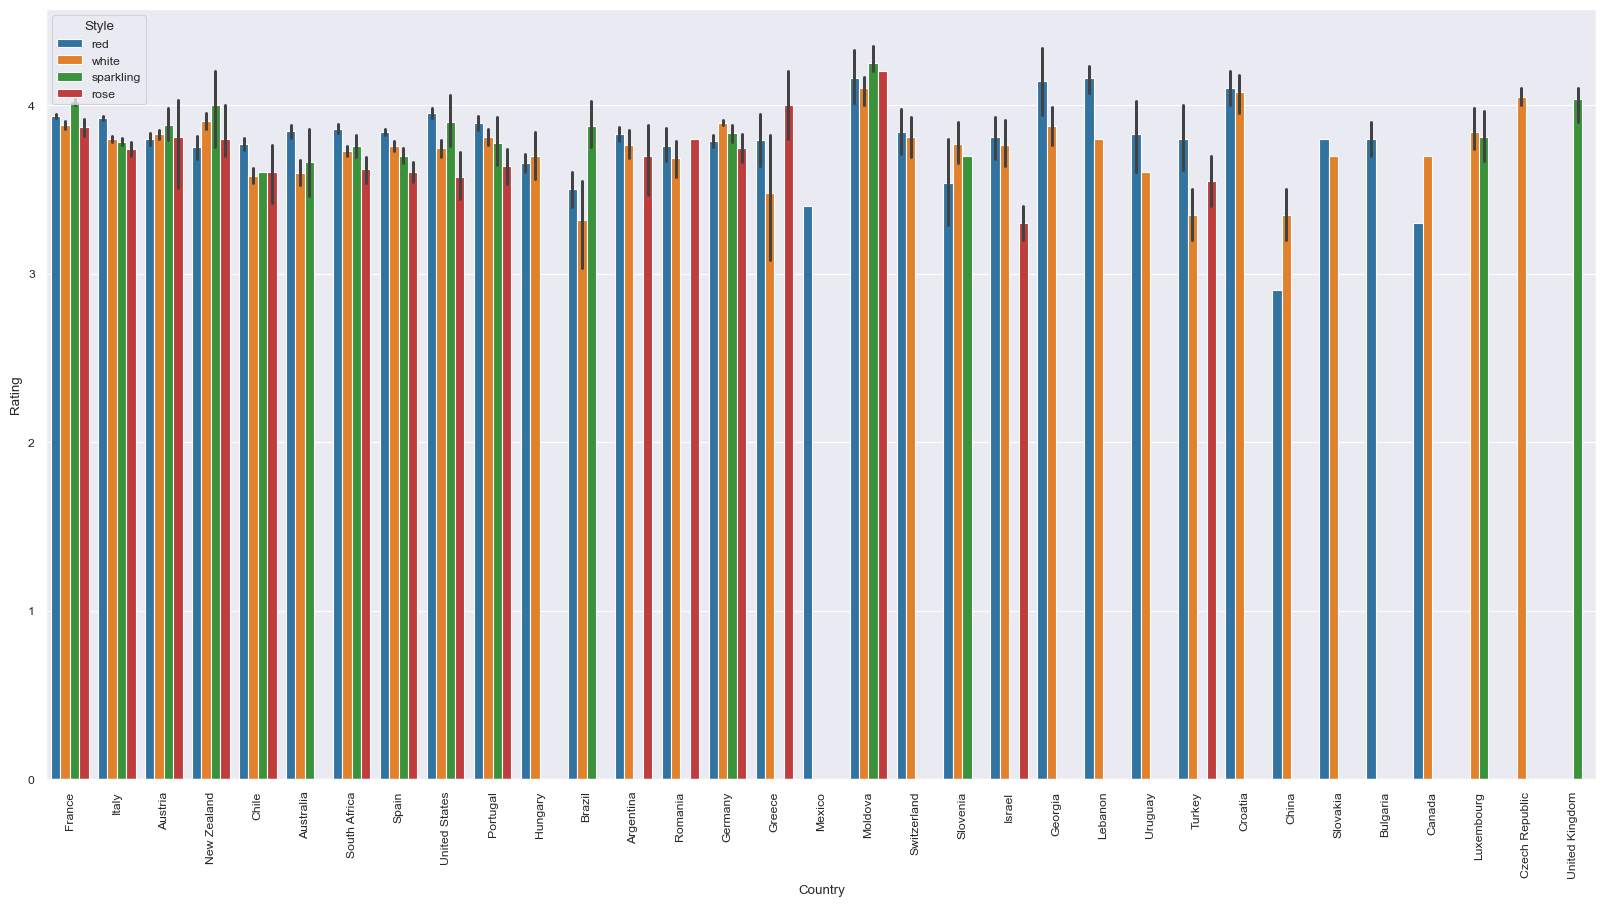

In [482]:
caunt(vino_df)

In [483]:
def pie(wines):
    df_country = wines.groupby(wines['Country'])['Country'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    df_country.plot.pie(autopct='%1.f%%',
                                                                 wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("% Wise Distribution of Country")

    plt.subplot(122)
    df_country.plot(marker='o',markersize=10,color='red')
    df_country.plot(kind='bar',color='green')
    plt.title("Distribution of Country");
    plt.show()

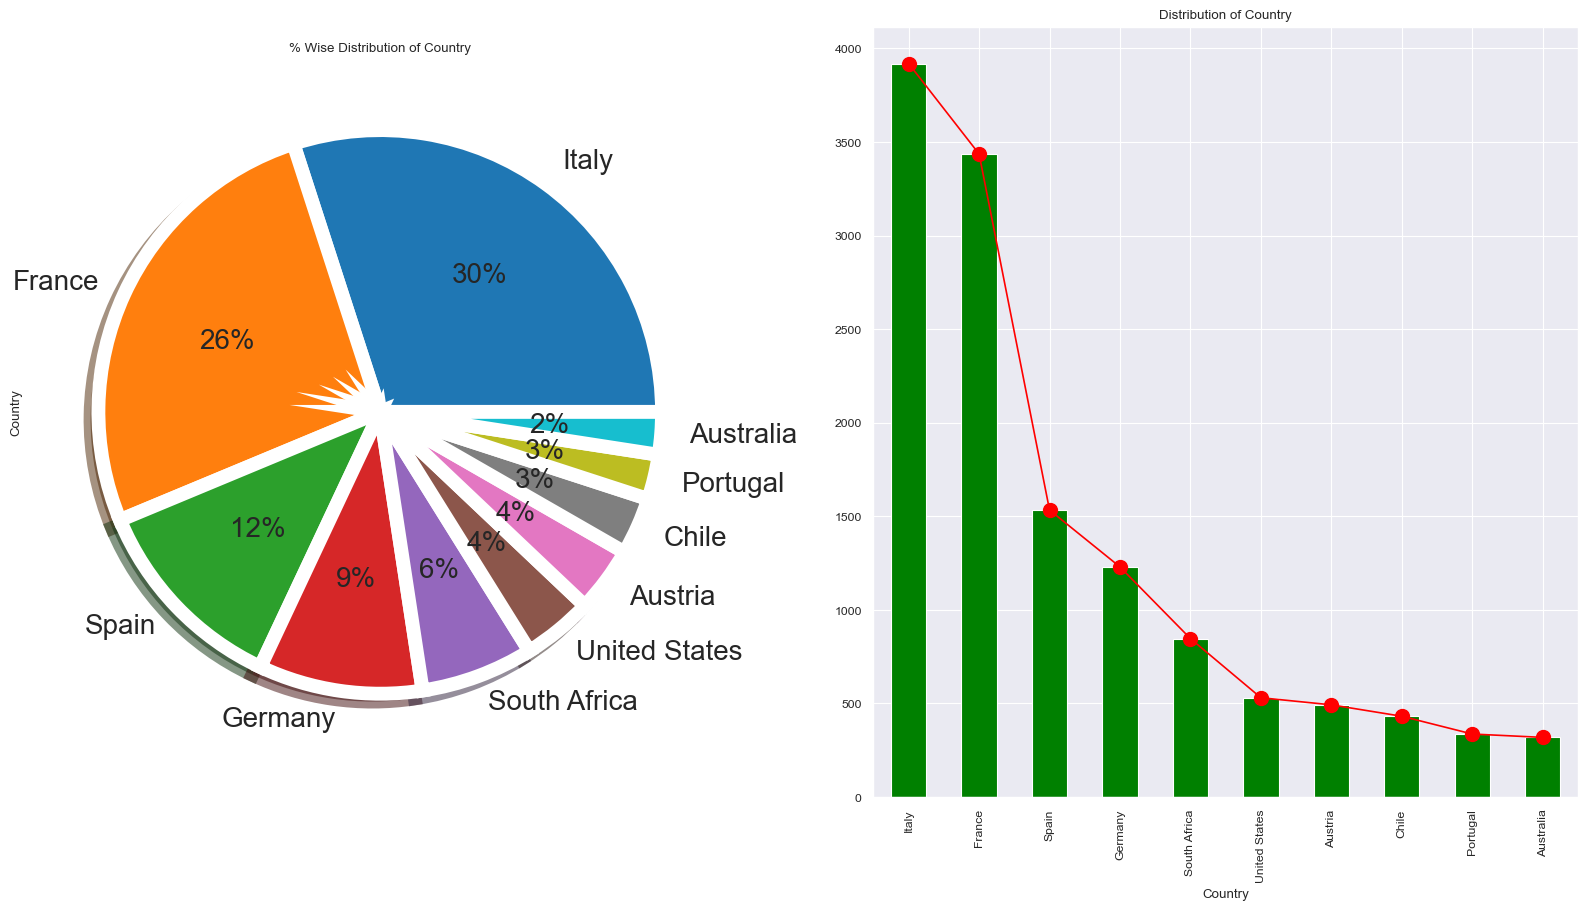

In [484]:
pie(vino_df)

In [485]:
def MultiPlots_Univariate(df_plot):

    for col in df_plot.columns:
        if (df_plot[col].dtype == 'int64') or (df_plot[col].dtype == 'float64'):
            #uses Plot.ly express
            fig = px.histogram(df_plot, x=col)
            fig.update_layout(title=go.layout.Title(text=col,x = 0, font=dict(size=18,color='red')))
            fig.show()
        elif df_plot[col].dtype == 'category':
            df_pie = df_plot.copy()
            #Pie plots need data to be arranged in terms of the pie sizes, hence use groupby to get sizes of each group
            df_pie.insert(0,'freq', 1) # Insert a column for the frequency of the group
            df_pie.insert(1,'%', 1) # Insert a column for the %size of the group
            df_pie = df_pie[[col, 'freq', '%']] # The data frame consists of just the required columns
            df_pie = df_pie.groupby(col).agg(sum) # Groupby each column by the groups, with values equal to sum of group
            df_pie['%'] = df_pie['freq'].apply(lambda x : 100* (x / len(df_pie)) )
            sizes = df_pie['%'].values
            values = df_pie['freq'].values
            labels = df_pie.index.values
            #uses Plot.ly go
            fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
            fig.update_layout(title=go.layout.Title(text=col,x = 0, font=dict(size=18,color='red')))
            fig.show()

    return(0)

In [486]:
MultiPlots_Univariate(vino_df)

0

<Figure size 2000x1000 with 0 Axes>

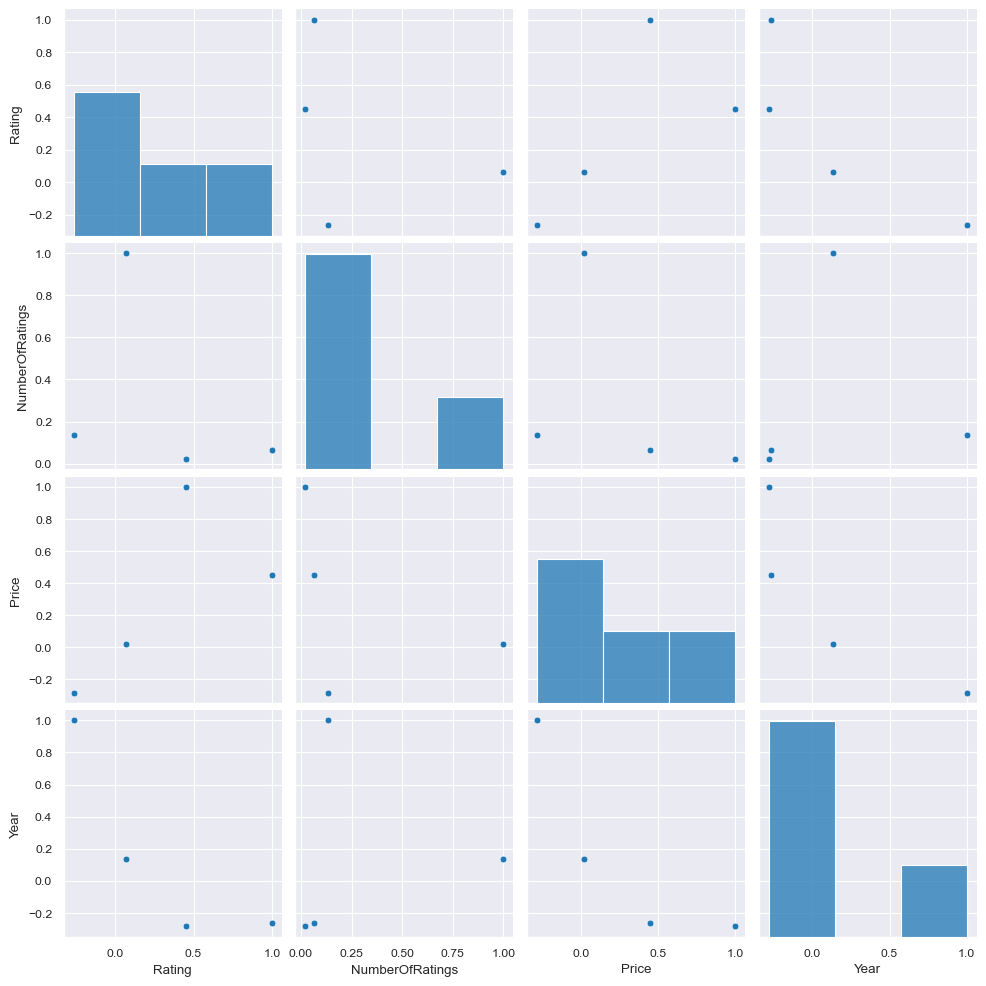

In [487]:
correlations  = vino_df.corr()
plt.figure(figsize=(20,10))
sns.pairplot(correlations)
plt.show()

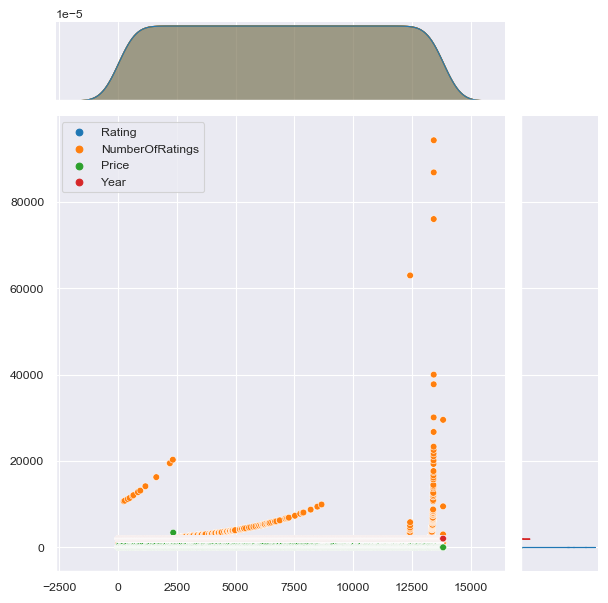

In [488]:
sns.jointplot(data=vino_df)
plt.show()

In [489]:
def MultiPlots_Bivariate(df_plot):

    #Matrix Plot All variables
    fig = px.scatter_matrix(df_plot)
    fig.update_layout(
    width=1500,
    height=1500,)
    fig.update_layout(title=go.layout.Title(text = 'Matrix Plot All Variables', x = 0, font=dict(size=18,color='red')))
    fig.show()

    # We use itertools to create combinations of 2 elements from all variables
    for combination in itertools.combinations(df_plot.columns, 2):
        x= combination[0]
        y = combination[1]

        if ((df_plot[x].dtype == 'int64') or (df_plot[x].dtype == 'float64')) and ((df_plot[y].dtype == 'int64') or (df_plot[y].dtype == 'float64')):
            pass
        elif (str(df_plot[x].dtype) == 'category') and ((df_plot[y].dtype == 'int64') or (df_plot[y].dtype == 'float64')):
            fig = px.box(df_plot, x=x, y=y)
            fig.update_layout(title=go.layout.Title(text = 'Boxplot {} vs {}'.format(y, x), x = 0, font=dict(size=18,color='red')))
            fig.show()
        elif (str(df_plot[y].dtype) == 'category') and ((df_plot[x].dtype == 'int64') or (df_plot[x].dtype == 'float64')):
            fig = px.box(df_plot, x=y, y=x)
            fig.update_layout(title=go.layout.Title(text = 'Boxplot {} vs {}'.format(x, y), x = 0, font=dict(size=18,color='red')))
            fig.show()
        elif (str(df_plot[x].dtype) == 'category') and (str(df_plot[y].dtype) == 'category'):
            #create stacked bar chart
            xtab = pd.crosstab(df_plot[x], df_plot[y], dropna=False) # pandas cross tab feature comes very handy
            x_row = list(xtab.columns[:]) # the x axis would be the same for all stackings
            fig = go.Figure()
            for i in range(0, len(xtab.index)): #we loop through all the rows
                fig.add_trace(go.Bar(x=x_row, y=xtab.iloc[i], name = xtab.index[i])) #with iloc select the entire row as stack
                fig.update_layout(barmode='relative', title = go.layout.Title(text='Stacked plot {} vs {}'.format(x, y), x = 0, font=dict(size=18,color='red')))
                fig.update_layout(xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text=x)),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(
            text=y)))
            fig.show()

In [490]:
MultiPlots_Bivariate(vino_df)

In [493]:
def Encoder(vino_df):
    vino = pd.get_dummies(vino_df, columns = ['Style'])
    categorical_cols = [col for col in vino.columns if vino[col].dtype == "object"]
    label_encoder = preprocessing.LabelEncoder()
    for col in categorical_cols:
        vino[col] = label_encoder.fit_transform(vino[col])
    return vino

In [494]:
vino_df = Encoder(vino_df)
vino_df

Country  Region  Winery  Rating  NumberOfRatings  Price  Year  \
0           10     574     791     4.2              100  95.00  2011   
1           10     404     891     4.3              100  15.50  2017   
2           16     748    2809     3.9              100   7.45  2015   
3           16      61     559     3.5              100   8.72  2019   
4            2     143    2289     3.9              100  29.15  2016   
...        ...     ...     ...     ...              ...    ...   ...   
13829       10     393    1823     3.9             1750   9.36  2019   
13830       10     267    2394     4.0             2046  12.85  2019   
13831       10     267    1024     4.2             2990  16.47  2019   
13832       22     809     509     3.5             9493   4.35  2030   
13833       22     291    2346     3.6            29531   5.99  2030   

       Style_red  Style_rose  Style_sparkling  Style_white  
0              1           0                0            0  
1              1           0                0            0  
2              1           0                0            0  
3              1           0                0            0  
4              1           0                0            0  
...          ...         ...              ...          ...  
13829          0           1                0            0  
13830          0           1                0            0  
13831          0           1                0            0  
13832          0           1                0            0  
13833          0           1                0            0  

[13834 rows x 11 columns]

In [535]:
predict = "Year"
x = vino_df.drop([predict], 1)
y = vino_df[predict]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=16,
                                   test_size=0.30,
                                   shuffle=True)

/var/folders/lq/7btllx4953scrkzwd28d3q040000gp/T/ipykernel_4093/3890661127.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [540]:
model = LinearRegression()
# model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

LinearRegression()

In [541]:
model.score(xtrain, ytrain)

0.43705492636005827

In [542]:
predictions = model.predict(xtest)
predictions

array([2017.03077513, 2015.32311711, 2016.88500387, ..., 2016.6540269 ,
       2024.52315651, 2015.69498646])

In [543]:
print('R2_score:', r2_score(ytest, predictions))
print('Mean Absolute Error:', mean_absolute_error(ytest, predictions))
print('Mean Squared Error:', mean_squared_error(ytest, predictions))

R2_score: 0.4553691528717819
Mean Absolute Error: 2.1544353694549807
Mean Squared Error: 11.074231476049286
